In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.manifold import TSNE

df = pd.read_csv('fraud_prediction.csv')
df = df.drop(['Unnamed: 0','isFraud'], axis = 1)

In [2]:
k_means = KMeans(n_clusters = 2)

In [3]:
k_means.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
target_labels = k_means.predict(df)
target_labels = pd.Series(target_labels)

In [5]:
df = pd.merge(df, pd.DataFrame(target_labels), left_index=True, right_index=True)

In [6]:
df['Fraud'] = df[0]

In [7]:
df = df.drop([0],axis = 1)

In [8]:
features = df.drop('Fraud', axis = 1).values

In [10]:
target = df['Fraud'].values

In [11]:
#Initialize TSNE Object

tsne_object = TSNE()

transformed = tsne_object.fit_transform(features)

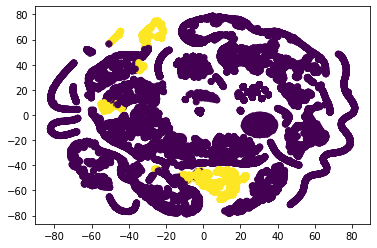

In [13]:
x_axis = transformed[:,0]
y_axis = transformed[:,1]

plt.scatter(x_axis,y_axis,c = target)
plt.show()